### Analysis on Masks from CRLM dataset

In [203]:
import os
import sys
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import json
from pprint import pprint
import numpy as np
import scipy.misc
from glob import glob

from scipy import stats  

In [17]:
# DATASET_PATH = '../dataset/John Dataset/cropped_John_data2/masks/'
DATASET_PATH = '../dataset/John Dataset/mask2/'
# files = next(os.walk(DATASET_PATH))[2]
file_paths = glob(DATASET_PATH+'*')

In [93]:
nuclei_counts = []
widths = np.array([])
heights = np.array([])

for file_path in file_paths:
    img = imread(file_path)
    nuclei_ids = np.delete(np.unique(img), 0)
    
    # counting nucleis per image
    nuclei_counts.append(nuclei_ids.shape[0])
    
    # finding width and height for each nuclei
    for nuclei_id in nuclei_ids:
        coords = np.where(img == nuclei_id)
        width = coords[0].max() - coords[0].min()
        height = coords[1].max() - coords[1].min()
        widths = np.append(widths, width)
        heights = np.append(heights, height)
        if height > 200:
            print(file_path)

../dataset/John Dataset/mask2/croped_im_30_22.png
../dataset/John Dataset/mask2/croped_im_30_22.png
../dataset/John Dataset/mask2/croped_im_20_44.png


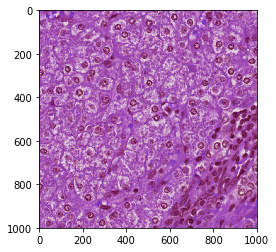

In [74]:
img = imread('../dataset/John Dataset/png_image/croped_im_30_22.png')
plt.imshow(img)

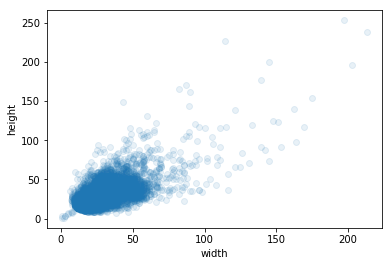

In [94]:
plt.scatter(widths, heights, alpha=0.1)
plt.xlabel('width')
plt.ylabel('height')
plt.show()

14550 14843 0.9802600552448966


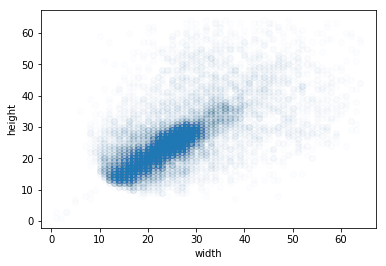

In [246]:
widths2 = widths[(widths<65) & (heights<65)]
heights2 = heights[(widths<65) & (heights<65)]

print(widths2.shape[0], widths.shape[0], widths2.shape[0]/widths.shape[0])

plt.scatter(widths2, heights2, alpha=0.01)
plt.xlabel('width')
plt.ylabel('height')
plt.show()

In [266]:
sizes = [64, 128, 150, 200]
total_nucleus = widths.shape[0]

print(f'Total neclue: {total_nucleus}')
print(f'Max width: {widths.max()} Min width: {widths.min()}')
print(f'Max height: {heights.max()} Min height: {heights.min()}')


print('Size \t Miss count \t Miss percent')
for size in sizes:
    widths_temp = widths[(widths<size) & (heights<size)]
    
    nucleus_count = widths_temp.shape[0]
    miss_count = total_nucleus-nucleus_count
    miss_percent = (miss_count / total_nucleus)*100

    print(f'{size} \t {miss_count} \t\t {miss_percent:.4f} %')


Total neclue: 14843
Max width: 213.0 Min width: 1.0
Max height: 253.0 Min height: 1.0
Size 	 Miss count 	 Miss percent
64 	 303 		 2.0414 %
128 	 25 		 0.1684 %
150 	 15 		 0.1011 %
200 	 5 		 0.0337 %


Text(0,0.5,'counts')

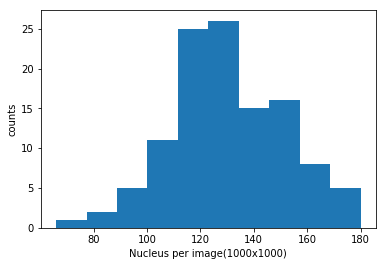

In [107]:
plt.hist(nuclei_counts, rwidth=1)
plt.xlabel('Nucleus per image(1000x1000)')
plt.ylabel('counts')

130.2017543859649 21.34272538235666
4848.046637224015 -1355.8534374531937 0.3065264494430173
3475.291935740878 53981757.06616613 -1128.2182102798724 19548241.238635123


/home/aiy/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


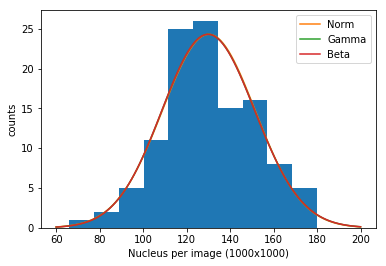

In [240]:
# create some normal random noisy data
# ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(nuclei_counts)
plt.xlabel('Nucleus per image (1000x1000)')
plt.ylabel('counts')


# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(nuclei_counts))

# lets try the normal distribution first
m, s = stats.norm.fit(nuclei_counts) # get mean and standard deviation  
print(m,s)
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g*1300, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(nuclei_counts)  
print(ag,bg,cg)
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma*1300, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(nuclei_counts)  
print(ab,bb,cb,db)

pdf_beta = stats.beta.pdf(lnspc, ab, bb, cb, db)  
plt.plot(lnspc, pdf_beta*1300, label="Beta")

plt.legend(loc='upper right')
plt.show()

/home/aiy/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:427: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/aiy/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


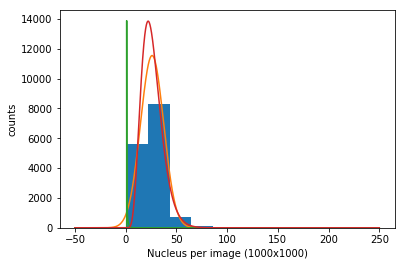

In [214]:
# plot normed histogram
plt.hist(widths)
plt.xlabel('Nucleus per image (1000x1000)')
plt.ylabel('counts')

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(widths))

# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_r', 'frechet_l', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 


# lets try the normal distribution first
m, s = stats.norm.fit(widths) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g*330000, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(widths)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma*3300, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(widths)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta*330000, label="Beta")

plt.show()  